### Kwantowa Trasformata Fouriera - zadania

In [1]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import QFT

Tworzymy obwód i inicjalizujemy stanem  $\vert 1 \rangle$

In [2]:
nqbits=3
qc = QuantumCircuit(nqbits)
qc.initialize([0,1,0,0,0,0,0,0], qc.qubits)
qc.draw()

┌──────────────────────────────┐
q_0: ┤0                             ├
     │                              │
q_1: ┤1 Initialize(0,1,0,0,0,0,0,0) ├
     │                              │
q_2: ┤2                             ├
     └──────────────────────────────┘

Symulacja

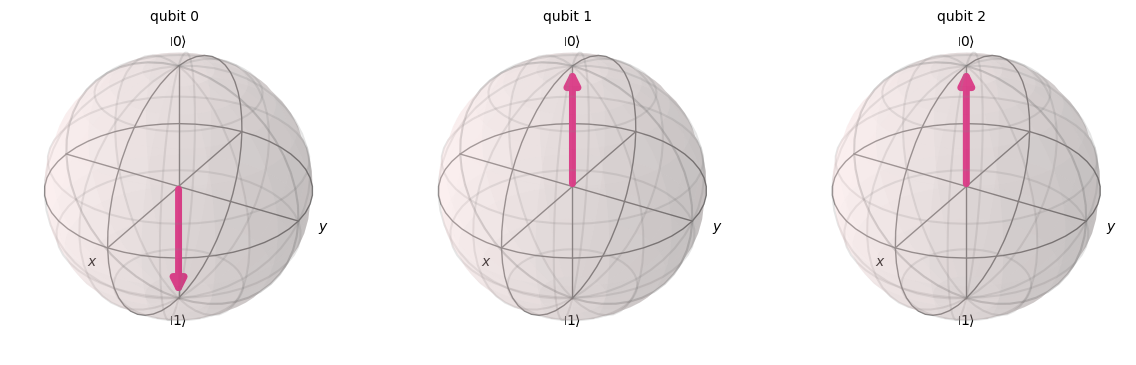

In [3]:

sim = Aer.get_backend("aer_simulator_statevector")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

In [4]:
print(statevector)

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


Prosty wykres ilustrujący amplitudy dla poszczególnych wektorów z bazy obliczeniowej wchodzących w skład naszego stanu. Są to w ogólności liczby zespolone, przedstawiamy je wszystkie na jednej płaszczyźnie zespolonej. 

Tutaj amplituda dla  $\vert 1 \rangle$ wyniosi 1, pozostałe 0. 

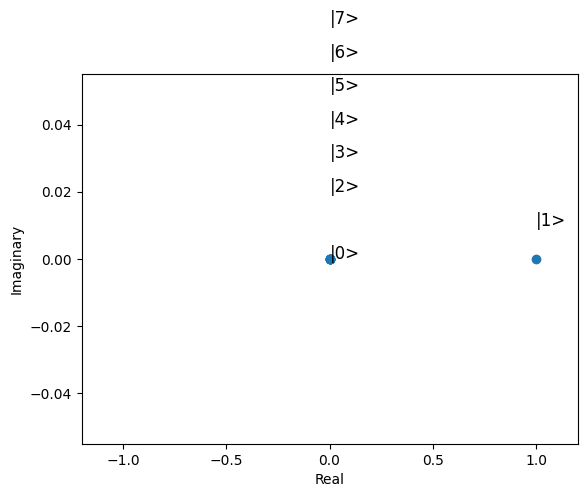

In [5]:
import matplotlib.pyplot as plt
X=[]
Y=[]
for x in range(pow(2,nqbits)):
    X.append(statevector[x].real)
    Y.append(statevector[x].imag)
plt.xlim([-1.2, 1.2])
plt.scatter(X, Y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
for index in range(len(X)):
  plt.text(X[index], Y[index]+index/100, "|"+str(index)+">", size=12)
  #plt.arrow(0,0,X[index], Y[index],width=0.001,head_width=0.02)
plt.show()

Dyskretna tnasformata Fouriera działa na wektor $(x_0, ..., x_{N-1})$ zamieniając go na wektor $(y_0, ..., y_{N-1})$ zgodnie ze wzorem:


$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_je^{2\pi i \frac{jk}{N}}$$

Kwantowa trasformata Fouriera działa na stan $\vert X\rangle = \sum_{j=0}^{N-1} x_j \vert j \rangle$ i zamienia go na stan $\vert Y\rangle = \sum_{k=0}^{N-1} y_k \vert k \rangle$ zgodnie ze wzorem


$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_je^{2\pi i \frac{jk}{N}}$$


Innymi słowy QFT zamienia stan $\vert j \rangle$ na sumę stanów bazowych zgodnie ze wzorem:

$$\vert j \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}e^{2\pi i \frac{jk}{N}} \vert k \rangle$$




Zobaczmy, jak w praktyce działa QFT

In [6]:
gate_qft = QFT(nqbits).to_gate()
#jeśli chcemy użyć odwrotnej transformaty IQFT
#gate_qft = QFT(nqbits).inverse().to_gate()
qc.append(
    gate_qft,
    qc.qubits
)
qc.draw()

┌──────────────────────────────┐┌──────┐
q_0: ┤0                             ├┤0     ├
     │                              ││      │
q_1: ┤1 Initialize(0,1,0,0,0,0,0,0) ├┤1 QFT ├
     │                              ││      │
q_2: ┤2                             ├┤2     ├
     └──────────────────────────────┘└──────┘

In [7]:
#symulacja
qc.save_statevector()

qc = transpile(qc, sim)
statevector = sim.run(qc).result().get_statevector()
#print(statevector)


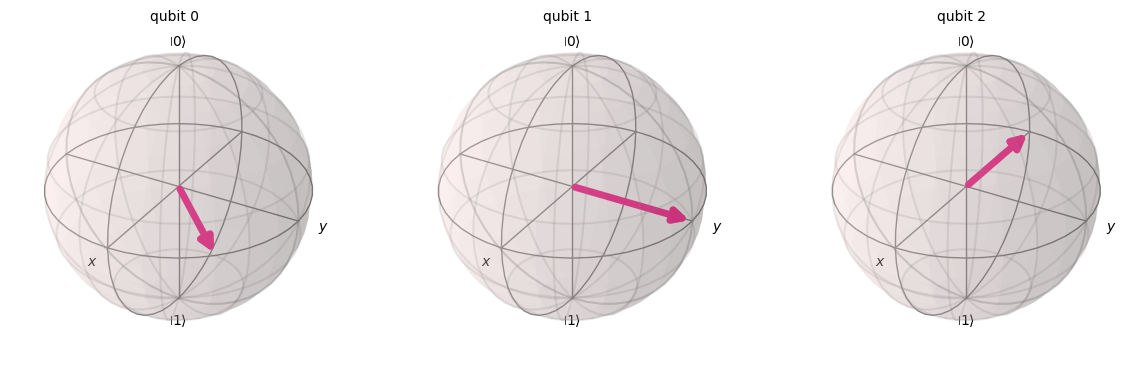

In [8]:
plot_bloch_multivector(statevector)

Rysujemy aplitudy stanu na 3 qbitach (czyli $N=2^3=8$).. Są to w ogólności liczby zespolone, przedstawiamy je wszystkie na jednej płaszczyźnie zespolonej. 


$QFT(\vert j \rangle) = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}e^{2\pi i \frac{jk}{N}} \vert k \rangle$

$j=1$ $N=8$ czyli:

$QFT(\vert 1 \rangle)=\frac{1}{\sqrt{8}}\sum_{k=0}^{7}e^{2\pi i \frac{k}{8}} \vert k \rangle$

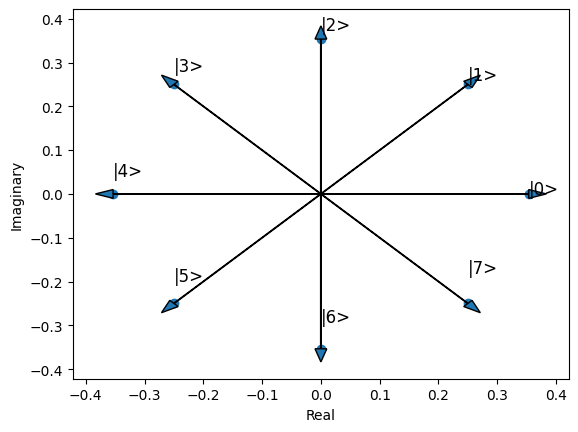

In [9]:
X=[]
Y=[]
for x in range(pow(2,nqbits)):
    X.append(statevector[x].real)
    Y.append(statevector[x].imag)
#plt.xlim([-1.2, 1.2])
plt.scatter(X, Y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
for index in range(len(X)):
  plt.text(X[index], Y[index]+index/100, "|"+str(index)+">", size=12)
  plt.arrow(0,0,X[index], Y[index],width=0.001,head_width=0.02)
plt.show()

Zadania:
1. Sprawdzić działanie trasformaty dla  kilku innych wybranych stanów $\vert j \rangle$. Sprawdzić zgodność ze wzorem.
2.Sprawdzić działanie odwrotnej transformaty dla stanu $\vert 1 \rangle$. Porównać z QFT
3. Sprawdzić działanie odwrotnej trasformaty dla stanów bazowych zmieniających się co pewien okres, który jest potęgą 2, w szczególności dla $\vert 1 \rangle$, $\vert 3 \rangle$, $\vert 5 \rangle$, $\vert 7 \rangle$ Porównać wykresy amplitud na płaszczyźnie zespolonej. Widać, że amplituda stanu $\vert 0 \rangle$ nie zmienia się w zależności od wejscia transformaty - dlaczego? Dla których stanow jeszcze to zachodzi ? Dlaczego?
Wskazówka: przyrównać odpowiednie wykładniki ze wzoru $$QFT(\vert j \rangle) = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}e^{2\pi i \frac{jk}{N}} \vert k \rangle$$
a dokladniej sprawdzić dla jakiego $k$ zachodzi: $$j_1k \equiv j_2k\mod{N}$$
$$\text{ gdzie }j_1-j_2 =r$$
4. Sprawdzić działanie odwrotnej transformaty dla superpozycji stanów bazowych zmieniających się co pewien okres który jest potęgą 2, w szczególności dla $0.5(\vert 1 \rangle$+$\vert 3 \rangle$+$\vert 5 \rangle$+ $\vert 7 \rangle)$

$j_1k \equiv j_2k\mod{N}$ - wykładnik ma okres 2 * pi * i,  a r to różnica kolejnych sprawdzanych liczb. jeśli r=4, to k = 0 i k = 2 -- w co drugim teście 2 ma taką samą amplitudę.

In [10]:
import math 
import cmath

def calculate_QFT_sim(bits):
    qc = QuantumCircuit(nqbits)
    qc.initialize(bits, qc.qubits)
    gate_qft = QFT(nqbits).to_gate()
    qc.append(
        gate_qft,
        qc.qubits
    )
    qc.save_statevector()
    qc = transpile(qc, sim)
    return sim.run(qc).result().get_statevector()


def calculate_IQFT(bits):
    qc = QuantumCircuit(nqbits)
    qc.initialize(bits, qc.qubits)
    gate_qft = QFT(nqbits).inverse().to_gate()
    qc.append(
        gate_qft,
        qc.qubits
    )
    qc.save_statevector()
    qc = transpile(qc, sim)
    return sim.run(qc).result().get_statevector()


def calculate_QFT_manual(bits):
    res = []
    for i in range(len(bits)):
        curr = 0
        for j in range(0, len(bits)):
            r = bits[j] / math.sqrt(len(bits))
            phi = 2 * cmath.pi * j * i / len(bits)
            curr += cmath.rect(r, phi)
        res.append(curr)
    return res


def compare(vec1, vec2, epsilon=pow(10, -10)):
    for v1, v2 in zip(vec1, vec2):
        if abs(v1.real - v2.real) > epsilon or abs(v1.imag - v2.imag) > epsilon:
            return False
    return True


def compare_for_bits(bits):
    statevec = calculate_QFT_sim(bits)
    simple_vec = calculate_QFT_manual(bits)
    return compare(statevec, simple_vec)


def plot_statevector(statevector, additional_drawings=True):
    X=[]
    Y=[]
    for x in range(pow(2,nqbits)):
        X.append(statevector[x].real)
        Y.append(statevector[x].imag)
    #plt.xlim([-1.2, 1.2])
    plt.scatter(X, Y)
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    if additional_drawings:
        for index in range(len(X)):
            plt.text(X[index], Y[index]+index/100, "|"+str(index)+">", size=12)
            plt.arrow(0,0,X[index], Y[index],width=0.001,head_width=0.02)
    plt.show()

### 1.

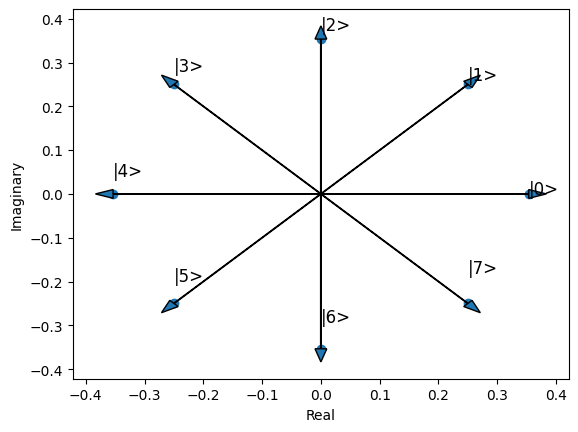

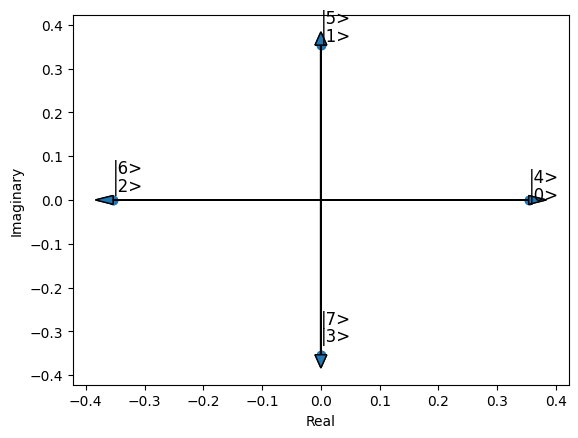

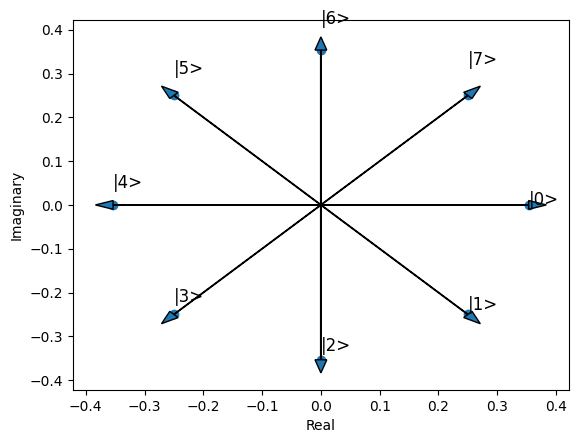

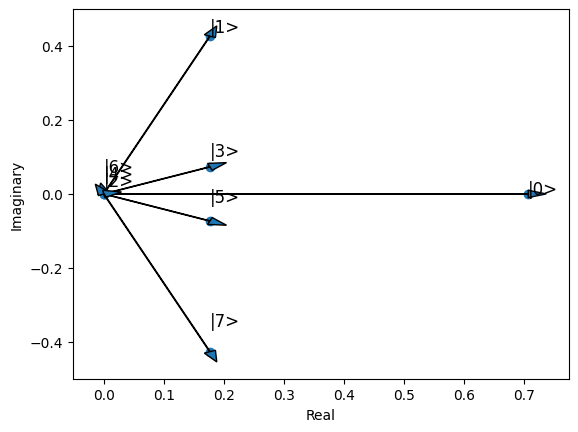

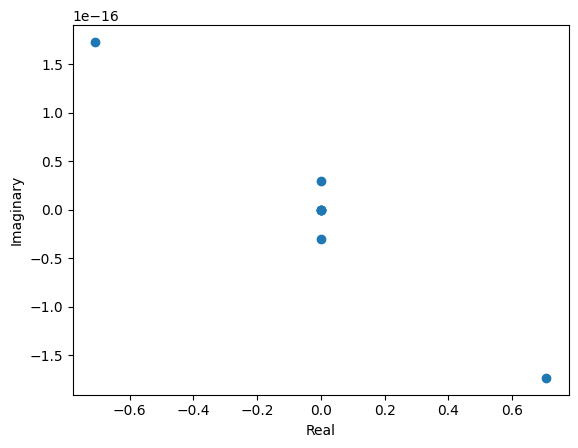

=====
True
True
True
True
True


C:\Users\micha\AppData\Local\Temp\ipykernel_12836\1013642729.py:43: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for v1, v2 in zip(vec1, vec2):


In [11]:
plot_statevector(calculate_QFT_sim([0, 1, 0, 0, 0, 0, 0, 0]))
plot_statevector(calculate_QFT_sim([0, 0, 1, 0, 0, 0, 0, 0]))
plot_statevector(calculate_QFT_sim([0, 0, 0, 0, 0, 0, 0, 1]))
plot_statevector(calculate_QFT_sim([1/2, 1/2, 1/2, 1/2, 0, 0, 0, 0]))
plot_statevector(calculate_QFT_sim([0, 1/2, 0, 1/2, 0, 1/2, 0, 1/2]), False)

print('=====')

print(compare_for_bits([0, 1, 0, 0, 0, 0, 0, 0]))
print(compare_for_bits([0, 0, 1, 0, 0, 0, 0, 0]))
print(compare_for_bits([0, 0, 0, 0, 0, 0, 0, 1]))
print(compare_for_bits([1/2, 1/2, 1/2, 1/2, 0, 0, 0, 0]))
print(compare_for_bits([0, 1/2, 0, 1/2, 0, 1/2, 0, 1/2]))


Statevector([-4.35360362e-17+2.98066726e-18j,
              1.00000000e+00-3.40706266e-16j,
              2.59741390e-17+2.18871348e-17j,
              3.01721368e-17+2.03887379e-19j,
             -5.00033730e-18+9.71529920e-18j,
             -1.14345030e-16+9.57769059e-17j,
             -1.32781725e-17+2.66492387e-17j,
             -6.26898163e-17+6.10284526e-17j],
            dims=(2, 2, 2))


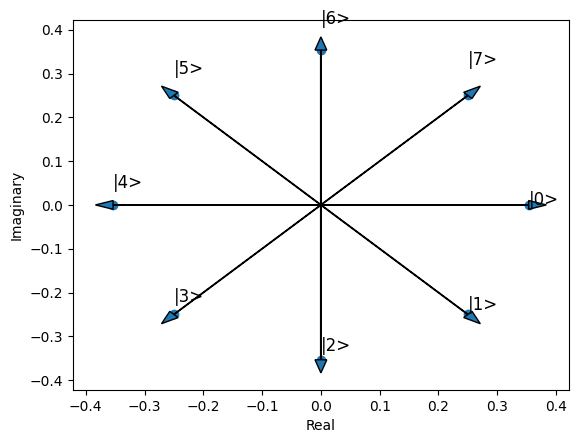

In [12]:
print(calculate_IQFT(calculate_QFT_sim([0, 1, 0, 0, 0, 0, 0, 0])))
plot_statevector(calculate_IQFT([0, 1, 0, 0, 0, 0, 0, 0]))

Wektory "idą" w odwrotną stronę

Dla zainteresowanych:
* https://learn.qiskit.org/course/ch-algorithms/quantum-fourier-transform
* https://learn.qiskit.org/course/ch-algorithms/quantum-phase-estimation

### 2.

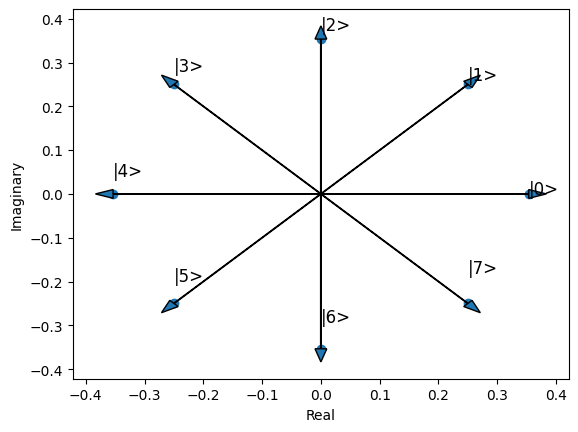

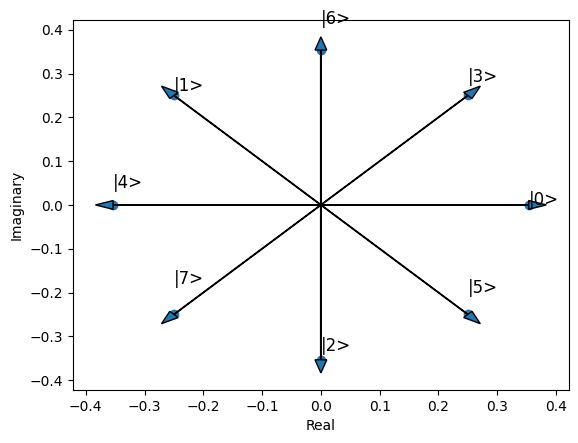

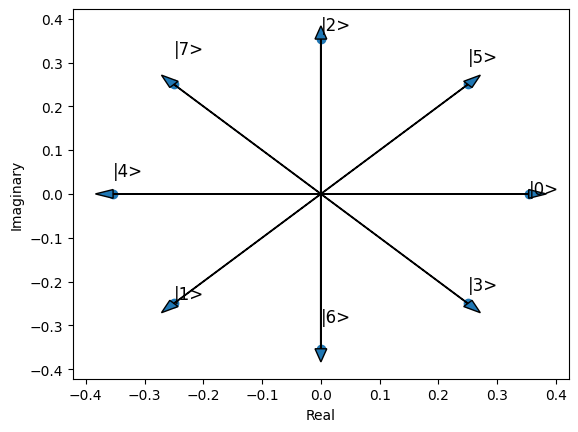

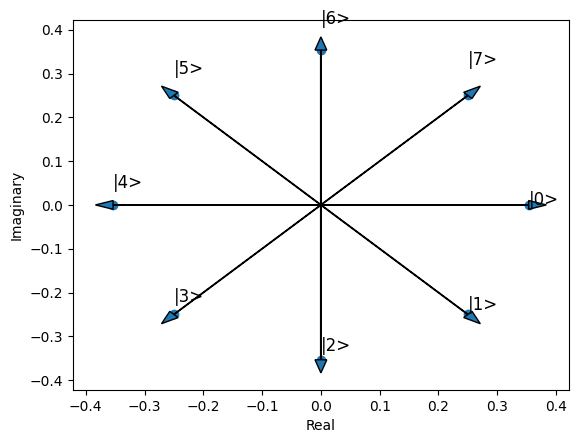

In [13]:
plot_statevector(calculate_QFT_sim([0, 1, 0, 0, 0, 0, 0, 0])) # 1
plot_statevector(calculate_QFT_sim([0, 0, 0, 1, 0, 0, 0, 0])) # 3
plot_statevector(calculate_QFT_sim([0, 0, 0, 0, 0, 1, 0, 0])) # 5
plot_statevector(calculate_QFT_sim([0, 0, 0, 0, 0, 0, 0, 1])) # 7

### 3.

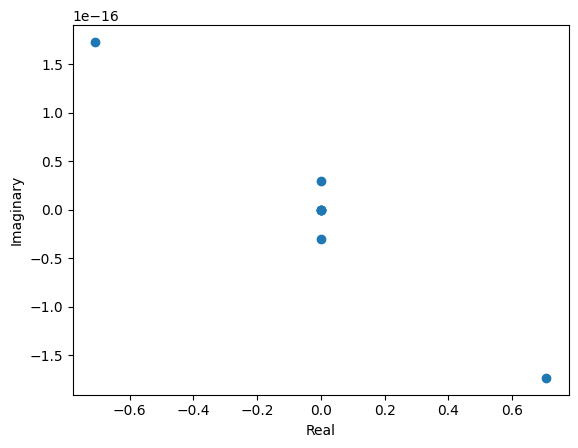

Statevector([ 7.07106781e-01-1.73191211e-16j,
              3.06161700e-17-5.92834045e-33j,
              4.32978028e-17-3.01681564e-17j,
              3.06161700e-17-4.05364073e-33j,
             -7.07106781e-01+1.73191211e-16j,
             -3.06161700e-17+5.92834045e-33j,
             -4.32978028e-17+3.01681564e-17j,
             -3.06161700e-17+4.05364073e-33j],
            dims=(2, 2, 2))


In [16]:
plot_statevector(calculate_IQFT([0, .5, 0, .5, 0, .5, 0, .5]), False)
print(calculate_IQFT([0, .5, 0, .5, 0, .5, 0, .5]))

In [10]:
import qiskit.tools.jupyter
%qiskit_version_table